In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from pprint import pprint

In [3]:
csv_file=pd.read_csv('who_data.csv')

In [4]:
who_df=pd.DataFrame(csv_file)
who_df.head()

,country,code,region,income,year,che_gdp,che_pc_usd,dis23_che,pop,Difference in POP,Population Growth Rate(%),che_usd,dis23_usd_pc,pfc_usd_pc
0,Algeria,DZA,AFR,Lower-middle,2000,3.5,62,NaN,"30,775",NaN,NaN,"1,912",NaN,740
1,Algeria,DZA,AFR,Lower-middle,2001,3.8,67,NaN,"31,201",426,1.39,"2,101",NaN,767
2,Algeria,DZA,AFR,Lower-middle,2002,3.7,67,NaN,"31,625",424,1.36,"2,117",NaN,789
3,Algeria,DZA,AFR,Lower-middle,2003,3.6,76,NaN,"32,056",431,1.36,"2,444",NaN,857
4,Algeria,DZA,AFR,Lower-middle,2004,3.5,93,NaN,"32,510",454,1.42,"3,024",NaN,"1,012"


In [5]:
who_df.rename(columns={'Column1':'Population Growth Rate(%)','che_gdp':'Current Health Expenditure % of GDP',
                       'che_pc_usd':'Current Health Expenditure Per Capita (USD)',
                       'dis23_che':'Expenditure on Contraceptive Management as % of Current Health Expenditure',
                      'pop':'Population(thousands)', 'che_usd':'Current Health Expenditure(millions USD)',
                      'dis23_usd_pc':'Contraceptive Management Per Capita (USD)',
                      'pfc_usd_pc':'Consumption Expenditure Per Capita(USD)'},inplace=True)
#who_df.drop(['Unnamed: 14','Unnamed: 15'],axis=1,inplace=True)


In [6]:
who_df.replace(',','', regex=True, inplace=True)

In [7]:
who_df.head()

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2000,3.5,62,NaN,30775,NaN,NaN,1912,NaN,740
1,Algeria,DZA,AFR,Lower-middle,2001,3.8,67,NaN,31201,426,1.39,2101,NaN,767
2,Algeria,DZA,AFR,Lower-middle,2002,3.7,67,NaN,31625,424,1.36,2117,NaN,789
3,Algeria,DZA,AFR,Lower-middle,2003,3.6,76,NaN,32056,431,1.36,2444,NaN,857
4,Algeria,DZA,AFR,Lower-middle,2004,3.5,93,NaN,32510,454,1.42,3024,NaN,1012


In [8]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   country                                                                     4032 non-null   object 
 1   code                                                                        4032 non-null   object 
 2   region                                                                      4032 non-null   object 
 3   income                                                                      4032 non-null   object 
 4   year                                                                        4032 non-null   int64  
 5   Current Health Expenditure % of GDP                                         3960 non-null   float64
 6   Current Health Expenditure Per Capita (USD)     

In [9]:
who_df.iloc[:,4:].astype(np.float64,errors='ignore')

,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,2000.0,3.5,62.0,NaN,30775.0,NaN,NaN,1912.0,NaN,740.0
1,2001.0,3.8,67.0,NaN,31201.0,426.0,1.39,2101.0,NaN,767.0
2,2002.0,3.7,67.0,NaN,31625.0,424.0,1.36,2117.0,NaN,789.0
3,2003.0,3.6,76.0,NaN,32056.0,431.0,1.36,2444.0,NaN,857.0
4,2004.0,3.5,93.0,NaN,32510.0,454.0,1.42,3024.0,NaN,1012.0
...,...,...,...,...,...,...,...,...,...,...
4027,2016.0,4.5,125.0,NaN,93127.0,935.0,1.00,11617.0,NaN,1511.0
4028,2017.0,4.7,141.0,NaN,94033.0,907.0,1.00,13260.0,NaN,1619.0
4029,2018.0,5.0,164.0,NaN,94914.0,881.0,1.00,15588.0,NaN,1746.0
4030,2019.0,5.0,174.0,NaN,95777.0,862.0,1.00,16632.0,NaN,1864.0


In [10]:
##How does consumption expenditure impact the % of healthcare expenditure 
#Ho=increasing consumption expenditure will not impact % of GDP that is spent on healthcare
#Ha=increasing consumption expendtire will reduce the % of GDP that is spent on healthcare

In [11]:
who_df=who_df.set_index('country')

In [12]:
consumption_che_df=who_df[['Current Health Expenditure % of GDP','Consumption Expenditure Per Capita(USD)']]
consumption=consumption_che_df.dropna(axis=0,how='any')
consumption=consumption.astype(np.float64)
consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, Algeria to Viet Nam
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Current Health Expenditure % of GDP      3960 non-null   float64
 1   Consumption Expenditure Per Capita(USD)  3960 non-null   float64
dtypes: float64(2)
memory usage: 92.8+ KB


In [13]:
def lin_regr_plt(data, x, y):
    # Scatter plot
    plt.scatter(data[x], data[y])
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
    line = slope * data[x] + intercept
    
    plt.text(x=0,y=0,s=f' y = {slope:.2f}x + {intercept:.2f}',fontsize=15,color='red')
    plt.plot(data[x], line, color='red')
    
    plt.xlabel(x)
    plt.ylabel(y)
    
    print(f' The r-value is: {r_value}')

NameError: name 'linregress' is not defined

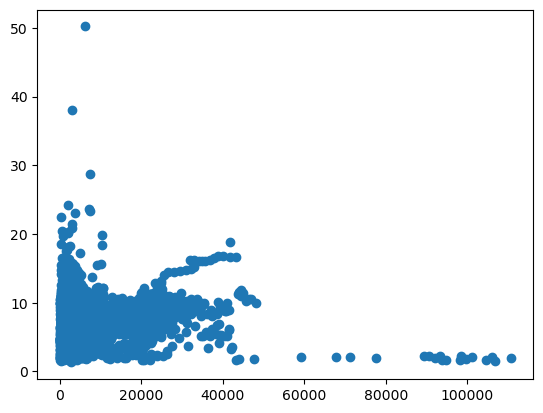

In [14]:
lin_regr_plt(consumption,'Consumption Expenditure Per Capita(USD)','Current Health Expenditure % of GDP')
stats.ttest_ind(consumption['Consumption Expenditure Per Capita(USD)'],consumption['Current Health Expenditure % of GDP'], equal_var=False)

In [ ]:
countries=consumption.groupby('country').apply(pd.DataFrame)


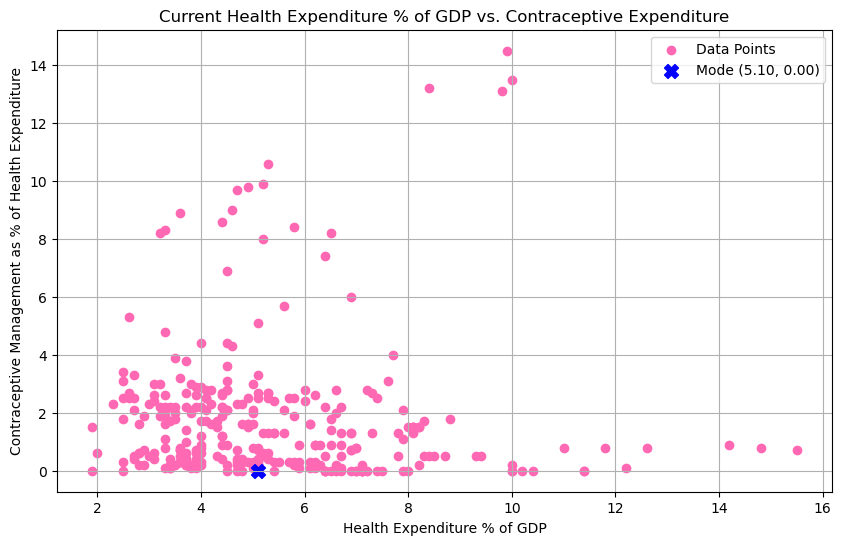

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV
df = pd.read_csv('who_data.csv')

# Drop rows with NaN values in 'che_gdp' or 'dis23_che'
df_cleaned = df.dropna(subset=['che_gdp', 'dis23_che'])

# Define DataFrames for specific columns
gdp_df = pd.DataFrame({
    'country': df_cleaned['country'],
    'che_gdp': df_cleaned['che_gdp']
})

contraceptive_df = pd.DataFrame({
    'country': df_cleaned['country'],
    'dis23_che': df_cleaned['dis23_che']
})

# Calculate mode for 'che_gdp' and 'dis23_che'
mode_che_gdp = gdp_df['che_gdp'].mode().values[0]
mode_dis23_che = contraceptive_df['dis23_che'].mode().values[0]

# Scatter plot for Current Health Expenditure % of GDP
plt.figure(figsize=(10, 6))
plt.scatter(gdp_df['che_gdp'], contraceptive_df['dis23_che'], color='hotpink', label='Data Points')

# Plot the mode points
plt.scatter(mode_che_gdp, mode_dis23_che, color='blue', label=f'Mode ({mode_che_gdp:.2f}, {mode_dis23_che:.2f})', s=100, marker='X')

plt.title('Current Health Expenditure % of GDP vs. Contraceptive Expenditure')
plt.xlabel('Health Expenditure % of GDP')
plt.ylabel('Contraceptive Management as % of Health Expenditure')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('che_gdp and dis23_che')
plt.show()


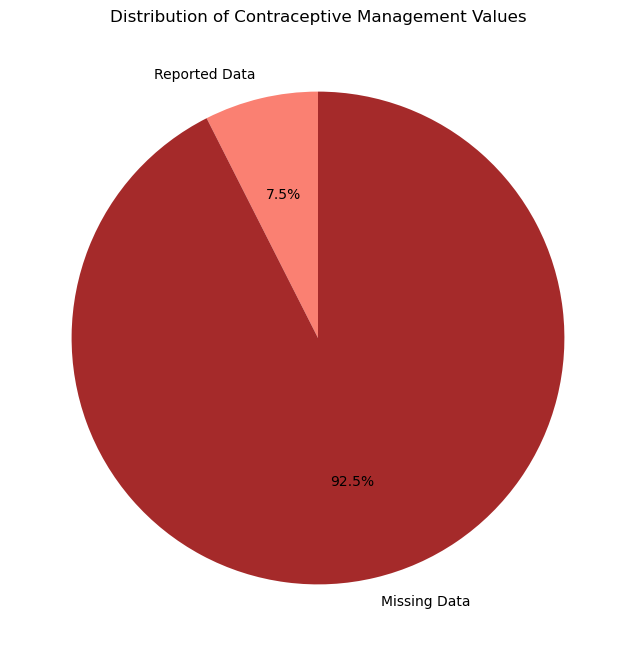

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# Replace 'your_dataset.csv' with your actual dataset

# Example:
df = pd.read_csv('who_data.csv')

# Assuming 'dis23_che' is the column you're interested in
column_name = 'dis23_che'

# Count the number of non-null and null values
non_null_count = df[column_name].count()
null_count = df[column_name].isnull().sum()

# Create a DataFrame for the pie chart
data = {'Labels': ['Reported Data', 'Missing Data'], 'Values': [non_null_count, null_count]}
df_pie = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Values'], labels=df_pie['Labels'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'brown'])
plt.title(f'Distribution of Contraceptive Management Values')
plt.savefig('Distribution of Contraceptive Management Values')
plt.show()
